# Training a perceptron model on the Iris dataset

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
import classifier
import util

In [7]:
iris_db = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris_db, header = None, encoding = 'utf-8')

In [3]:
df[4].value_counts()

NameError: name 'df' is not defined

## only select settosa and versicolor
* convert to class label 0 and 1 respectively
* Use two features of sepal & petal length as input

In [8]:
df = df[df[4].isin(['Iris-setosa', 'Iris-versicolor'])]

In [9]:
y = df[4].values
y = np.where(y == 'Iris-setosa', 0, 1)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
X = df.iloc[:,[0,2]].values

In [12]:
X[0:5]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4]])

### plot data

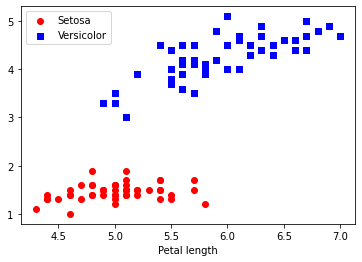

In [13]:
plt.scatter(X[:50,0], X[:50,1],
            color = 'red', marker = 'o', label= 'Setosa'
           )

plt.scatter(X[50:,0], X[50:,1],
            color = 'blue', marker = 's', label= 'Versicolor'
           )
plt.xlabel('Sepal length')
plt.xlabel('Petal length')
plt.legend(loc = 'upper left')
plt.show()

## Train perceptron algorithm on Iris dataset

In [11]:
ppn = perceptron.Perceptron(eta = 0.1, n_iter = 10)

In [12]:
ppn.fit(X,y)

In [13]:
ppn.errors_

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]

In [14]:
ppn.w_

array([-0.35375655,  0.91388244])

In [15]:
ppn.b_

-0.2

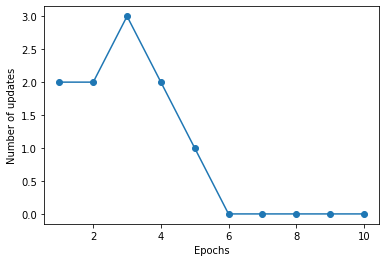

In [16]:
plt.plot(range(1, len(ppn.errors_) + 1), 
         ppn.errors_ , marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## plot decision region

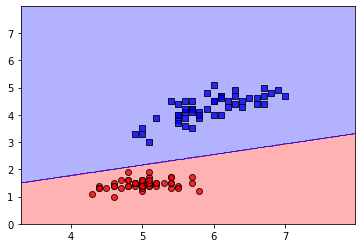

In [17]:
util.plot_decision_regions(X,y, classifier = ppn)

# Training Adaline model in different learning rate

In [14]:
ada1 = classifier.AdalineGD(n_iter = 15, eta = 0.1).fit(X,y)

In [17]:
ada2 = classifier.AdalineGD(n_iter = 15, eta = 0.0001).fit(X,y)

Text(0.5, 1.0, 'Adaline- learning rate 0.0001')

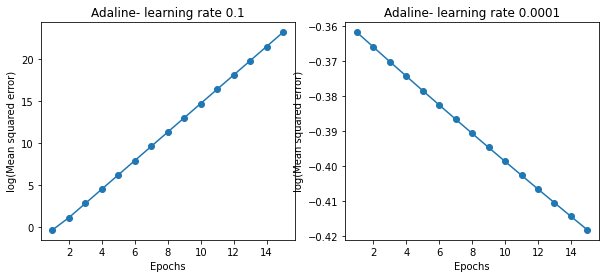

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].plot(range(1, len(ada1.losses_)+1),
           np.log10(ada1.losses_), marker = 'o',
          )
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline- learning rate 0.1')

ax[1].plot(range(1, len(ada2.losses_)+1),
           np.log10(ada2.losses_), marker = 'o',
          )
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Mean squared error)')
ax[1].set_title('Adaline- learning rate 0.0001')


## improving gradient descent through feature scaling of Iris data

In [27]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


In [28]:
ada_gd = classifier.AdalineGD(n_iter = 20, eta = 0.5)
ada_gd.fit(X_std, y)

Text(0, 0.5, 'Petal length')

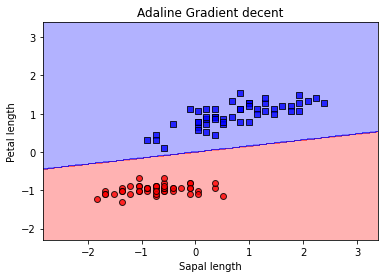

In [36]:
util.plot_decision_regions(X_std, y, classifier = ada_gd)
plt.title('Adaline Gradient decent')
plt.xlabel('Sapal length')
plt.ylabel('Petal length')
plt

plt.plot(

In [33]:
ada_gd.losses_

[0.49424363585358444,
 0.16533546753899678,
 0.1132579515992755,
 0.078888028632117,
 0.056204696229401566,
 0.04123423588290225,
 0.03135408780733648,
 0.024833424866070746,
 0.020529942279736993,
 0.017689746039309527,
 0.015815284014122,
 0.01457818362160078,
 0.013761726760585917,
 0.013222884634329945,
 0.012867261635869069,
 0.012632558907793521,
 0.01247766068466254,
 0.012375431538346799,
 0.012307962731118418,
 0.01226343492165436]